In [1]:
import pandas as pd
from wave import open as open_wave
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Opening the audio file to construct the signal

In [2]:
n=3

In [34]:
raw = open_wave('tea_vib'+str(n)+'.wav','rb')
signal= raw.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
f_rate=raw.getframerate() 

### creating a time vector to plot the signal  

In [35]:
time = np.linspace( 
        0, # start 
        len(signal) / f_rate, 
        num = len(signal) 
    ) 

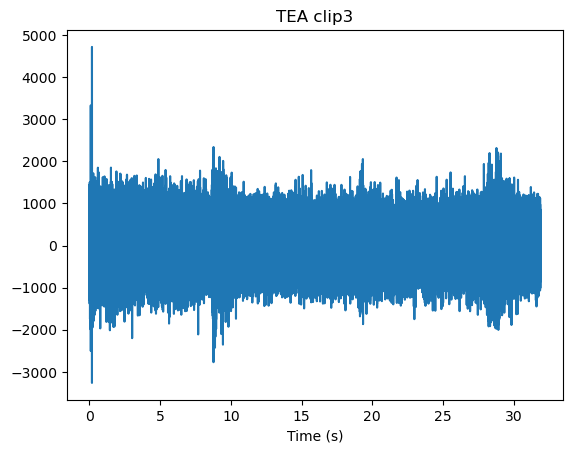

In [36]:
plt.figure(1) 
plt.title('TEA clip'+str(n)) 
plt.xlabel('Time (s)') 
plt.plot(time, signal) 
plt.show() 

## Finding dominant frequencies using FFT 

In [40]:
sig_fft = fftpack.rfft(signal)
power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(len(signal),time)


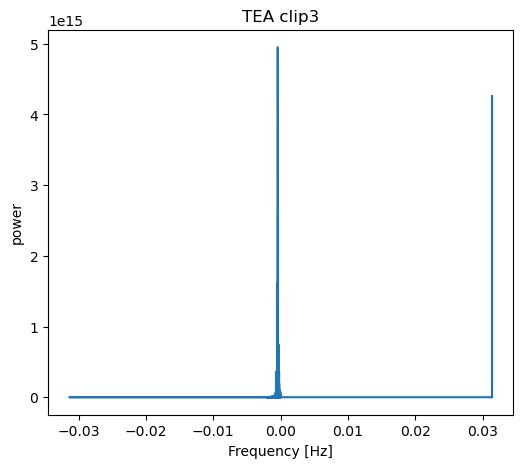

In [41]:
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('TEA clip'+str(n))
#plt.show()
plt.savefig('./plots/tea'+str(n)+'_rfft_freq.png')

### remove high frequencies 

#### note that at the moment its literally picking the frequency with the highest power. But this can be played around with 

In [12]:
peak_freq = sample_freq[power.argmax()]
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

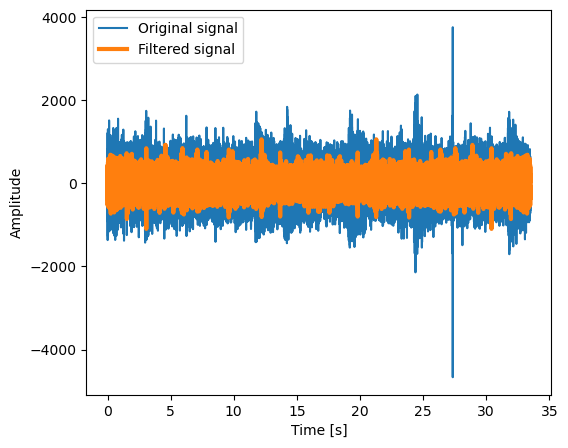

In [13]:
plt.figure(figsize=(6, 5))
plt.plot(time, signal, label='Original signal')
plt.plot(time, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()